USD to Birr Exchange Rate Forecaster 
== 

Required Data 

Exchange Rate and Dates history

Main influncial datas for foreign currency exchange 

- Inflation Rates 
- Interest Rate 
- Terms of Trade || Ethiopian and United States of America   

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

In [198]:
#Helper functions 

def normalize_Date_col(dates):
    
    new_dates = dates
    for i in range(dates.shape[0]):
        date = dates[i]
        month_to_changed = date[:3]
        day = date[4:6] 
        year = date[8:12]
        month = ""
        #print(month_to_changed)
        if month_to_changed == "Jan":
            month = "01"
        elif month_to_changed == "Feb":
            month = "02"
        elif month_to_changed == "Mar":
            month = "03"
        elif month_to_changed == "Apr":
            month = "04"
        elif month_to_changed == "May":
            month = "05"
        elif month_to_changed == "Jun":
            month = "06"
        elif month_to_changed == "Jul":
            month = "07"
        elif month_to_changed == "Aug":
            month = "08"
        elif month_to_changed == "Sep":
            month = "09"
        elif month_to_changed == "Oct":
            month = "10"
        elif month_to_changed == "Nov":
            month = "11"
        elif month_to_changed == "Dec":
            month = "12"
        else: 
            month = "error"
        new_date = date[8:12] + "-" +  month + "-" + date[4:6]
       
        new_dates[i] = new_date
    return new_dates
            

In [199]:
Data = pd.read_csv("../Documents/MSC/AI ITSC/ML/Project/Training_Data_Engineered/EBirr_TO_USD_Forcaseter_Traininng_Data.csv")

In [200]:
Data

,Date,Price,Open,High,Low,Change %,et_Import,et_Export,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,"Apr 15, 2021",41.6969,41.6838,41.6969,41.3550,0.20%,39.0,32.0,-7.0,92.00,58.70,1.33
1,"Apr 14, 2021",41.6150,41.6676,41.6838,41.3500,0.08%,39.0,32.0,-7.0,92.00,58.70,1.33
2,"Apr 13, 2021",41.5825,41.6541,41.6905,41.3500,0.06%,39.0,32.0,-7.0,92.00,58.70,1.33
3,"Apr 12, 2021",41.5555,41.6377,41.6888,41.3250,0.08%,39.0,32.0,-7.0,92.00,58.70,1.33
4,"Apr 09, 2021",41.5227,41.6245,41.6674,41.5962,0.68%,39.0,32.0,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...
2679,"Jan 07, 2011",16.6415,16.5590,16.6415,16.5590,0.00%,137.5,7.6,-129.9,31.95,2.56,1.51
2680,"Jan 06, 2011",16.6420,16.5560,16.6990,16.5560,0.02%,137.5,7.6,-129.9,31.95,2.56,1.51
2681,"Jan 05, 2011",16.6390,16.5530,16.6960,16.5530,0.02%,137.5,7.6,-129.9,31.95,2.56,1.51
2682,"Jan 04, 2011",16.6360,16.5510,16.6360,16.5510,0.02%,137.5,7.6,-129.9,31.95,2.56,1.51


In [201]:
req_Data = Data[['Date' , 'Price' , 'Eth_Imp_Exp_Blnc' , "GDB" , 'Debt' , 'PST']]

In [202]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,"Apr 15, 2021",41.6969,-7.0,92.00,58.70,1.33
1,"Apr 14, 2021",41.6150,-7.0,92.00,58.70,1.33
2,"Apr 13, 2021",41.5825,-7.0,92.00,58.70,1.33
3,"Apr 12, 2021",41.5555,-7.0,92.00,58.70,1.33
4,"Apr 09, 2021",41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,"Jan 07, 2011",16.6415,-129.9,31.95,2.56,1.51
2680,"Jan 06, 2011",16.6420,-129.9,31.95,2.56,1.51
2681,"Jan 05, 2011",16.6390,-129.9,31.95,2.56,1.51
2682,"Jan 04, 2011",16.6360,-129.9,31.95,2.56,1.51


In [203]:
USD = np.ones(req_Data['Date'].shape)

In [204]:
req_Data["USD"] = USD

<ipython-input-204-19db13b99c2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data["USD"] = USD


In [205]:
req_Data['Date'][0] = "Apr 15, 2021"

<ipython-input-205-a0989de8d394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data['Date'][0] = "Apr 15, 2021"
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [206]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST,USD
0,"Apr 15, 2021",41.6969,-7.0,92.00,58.70,1.33,1.0
1,"Apr 14, 2021",41.6150,-7.0,92.00,58.70,1.33,1.0
2,"Apr 13, 2021",41.5825,-7.0,92.00,58.70,1.33,1.0
3,"Apr 12, 2021",41.5555,-7.0,92.00,58.70,1.33,1.0
4,"Apr 09, 2021",41.5227,-7.0,92.00,58.70,1.33,1.0
...,...,...,...,...,...,...,...
2679,"Jan 07, 2011",16.6415,-129.9,31.95,2.56,1.51,1.0
2680,"Jan 06, 2011",16.6420,-129.9,31.95,2.56,1.51,1.0
2681,"Jan 05, 2011",16.6390,-129.9,31.95,2.56,1.51,1.0
2682,"Jan 04, 2011",16.6360,-129.9,31.95,2.56,1.51,1.0


In [207]:
#re_arrange Data 

req_Data = req_Data[['Date' , "Price"  , "Eth_Imp_Exp_Blnc" , "GDB" , "Debt" , "PST"]]

In [208]:

req_Data["Date"] = Data["Date"]
new_Dates = normalize_Date_col(req_Data["Date"])

<ipython-input-208-f746e52afecc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data["Date"] = Data["Date"]
<ipython-input-198-4fde800398f3>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dates[i] = new_date
<ipython-input-208-f746e52afecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Dates = normalize_Date_col(req_Data["Date"])


In [209]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,2021-04-15,41.6969,-7.0,92.00,58.70,1.33
1,2021-04-14,41.6150,-7.0,92.00,58.70,1.33
2,2021-04-13,41.5825,-7.0,92.00,58.70,1.33
3,2021-04-12,41.5555,-7.0,92.00,58.70,1.33
4,2021-04-09,41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,2011-01-07,16.6415,-129.9,31.95,2.56,1.51
2680,2011-01-06,16.6420,-129.9,31.95,2.56,1.51
2681,2011-01-05,16.6390,-129.9,31.95,2.56,1.51
2682,2011-01-04,16.6360,-129.9,31.95,2.56,1.51


In [210]:
req_Data["Date"] = pd.to_datetime(req_Data["Date"])

<ipython-input-210-1a5228b60450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data["Date"] = pd.to_datetime(req_Data["Date"])


In [211]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,2021-04-15,41.6969,-7.0,92.00,58.70,1.33
1,2021-04-14,41.6150,-7.0,92.00,58.70,1.33
2,2021-04-13,41.5825,-7.0,92.00,58.70,1.33
3,2021-04-12,41.5555,-7.0,92.00,58.70,1.33
4,2021-04-09,41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,2011-01-07,16.6415,-129.9,31.95,2.56,1.51
2680,2011-01-06,16.6420,-129.9,31.95,2.56,1.51
2681,2011-01-05,16.6390,-129.9,31.95,2.56,1.51
2682,2011-01-04,16.6360,-129.9,31.95,2.56,1.51


In [212]:
#lets visualize some data 

#import mathplot

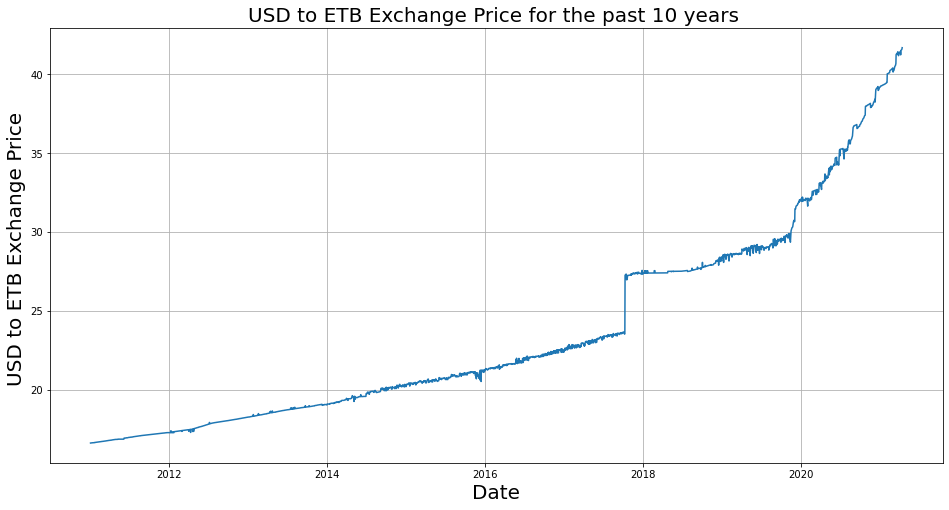

In [213]:

plt.figure(figsize = (16,8))
plt.plot( req_Data["Date"] , req_Data['Price'])

plt.xlabel('Date' , fontsize="20")
plt.ylabel('USD to ETB Exchange Price ' , fontsize = "20" )
plt.title('USD to ETB Exchange Price for the past 10 years ' , fontsize = "20")
plt.grid()

plt.show()

# Exchange Rate and other factors through time 

fig, ax = plt.subplots()

ax.plot( req_Data["Date"] , req_Data['Price'] , label='Exchange Rate')

ax.plot( req_Data["Date"] , req_Data['GDB'] , label = "GDB")
ax.plot( req_Data["Date"] , req_Data['Debt'] , label = "Dept")
ax.plot( req_Data["Date"] , req_Data['PST'] , label = "PST ")
ax.plot( req_Data["Date"] , req_Data['Eth_Imp_Exp_Blnc'] , label = "Eth_Imp_Exp_Blnc ")

ax.set(xlabel='Date', ylabel='Histories',
       title='USD to ETB Exchange Price for the past 10 years ')
ax.grid()
ax.legend()
plt.show()



In [230]:
#explain the data 
req_Data.describe()

,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
count,2684.000000,2684.000000,2684.000000,2684.000000,2684.00000
mean,23.671885,-61.451602,68.197949,37.526788,-0.78598
std,6.214876,91.861573,21.348068,16.937466,1.23324
min,16.633500,-426.300000,31.950000,2.560000,-1.68000
25%,18.805250,-119.000000,47.650000,28.600000,-1.50000
50%,21.413000,-25.700000,74.300000,34.900000,-1.34000
75%,27.716525,-0.200000,84.270000,57.000000,-1.27000
max,41.696900,37.500000,95.910000,60.000000,1.56000


In [214]:
#Get the Price Column 



In [309]:
price_Data = req_Data.filter(['Price'])


In [216]:
#change to numpy array
price_Data = price_Data.values
price_Data

array([[41.6969],
       [41.615 ],
       [41.5825],
       ...,
       [16.639 ],
       [16.636 ],
       [16.6335]])

In [217]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,2021-04-15,41.6969,-7.0,92.00,58.70,1.33
1,2021-04-14,41.6150,-7.0,92.00,58.70,1.33
2,2021-04-13,41.5825,-7.0,92.00,58.70,1.33
3,2021-04-12,41.5555,-7.0,92.00,58.70,1.33
4,2021-04-09,41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,2011-01-07,16.6415,-129.9,31.95,2.56,1.51
2680,2011-01-06,16.6420,-129.9,31.95,2.56,1.51
2681,2011-01-05,16.6390,-129.9,31.95,2.56,1.51
2682,2011-01-04,16.6360,-129.9,31.95,2.56,1.51


In [218]:
#prepare the data in X (independant variable ) and Y (dependannt variable)

In [219]:
x = req_Data[['Date','Eth_Imp_Exp_Blnc' , 'GDB' , 'Debt' , 'PST']]

In [220]:
x['Date'] = x['Date'].map(datetime.toordinal)

<ipython-input-220-fcd9041cbd55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Date'] = x['Date'].map(datetime.toordinal)


In [221]:
x

,Date,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,737895,-7.0,92.00,58.70,1.33
1,737894,-7.0,92.00,58.70,1.33
2,737893,-7.0,92.00,58.70,1.33
3,737892,-7.0,92.00,58.70,1.33
4,737889,-7.0,92.00,58.70,1.33
...,...,...,...,...,...
2679,734144,-129.9,31.95,2.56,1.51
2680,734143,-129.9,31.95,2.56,1.51
2681,734142,-129.9,31.95,2.56,1.51
2682,734141,-129.9,31.95,2.56,1.51


In [222]:
y = req_Data['Price']

In [294]:
#lets split the data into train and test data 80/20
# we use the sklearn library 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [295]:
x_train.shape , x.shape , x_test.shape

((2147, 5), (2684, 5), (537, 5))

In [296]:
#Next step is to train the model 

#we used Multiple Linear Regressionn 

regressor = LinearRegression()


In [297]:
regressor.fit(x_train , y_train)

LinearRegression()

In [298]:
regressor

LinearRegression()

In [299]:
regressor.coef_

array([ 0.01156399,  0.00293725, -0.30627987,  0.02290108,  1.02813351])

In [300]:
y_pred = regressor.predict(x_test)

In [301]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred , "Difference" : y_test - y_pred})

,Actual,Predicted,Difference
1327,21.4000,21.223108,0.176892
1282,21.6408,21.870278,-0.229478
2423,17.2940,16.128189,1.165811
1835,19.4095,18.894084,0.515416
418,29.1300,30.140802,-1.010802
...,...,...,...
1225,22.1050,22.959774,-0.854774
712,27.5678,29.083670,-1.515870
2637,16.7530,15.516004,1.236996
1161,22.4401,23.882163,-1.442063


In [302]:
Max_Error = max(y_test - y_pred)

Min_Error = min(y_test - y_pred)

Max_Error , Min_Error

(3.6014022460709256, -2.4148432464778935)

In [303]:
#Final Step Examine the prediction 

#we use ssklearnn meterics to check

In [304]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [305]:
MAE , MSE , RMSE

(0.8981384538744139, 1.2675808815552352, 1.1258689451065054)

In [306]:
min_Price = np.min(y)
max_Price = np.max(y)

In [307]:
min_Price , max_Price

(16.6335, 41.6969)

In [308]:
RMSE / (max_Price - min_Price) * 100

4.492083855767795